In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

In [2]:
# https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv
df = pd.read_csv("train.csv")

In [3]:
df.shape

(1460, 81)

In [4]:
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


# 1) Cite uma coluna com dados categóricos e plote um gráfico de barras com essa coluna.

In [5]:
df["SaleType"].unique()

array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'],
      dtype=object)

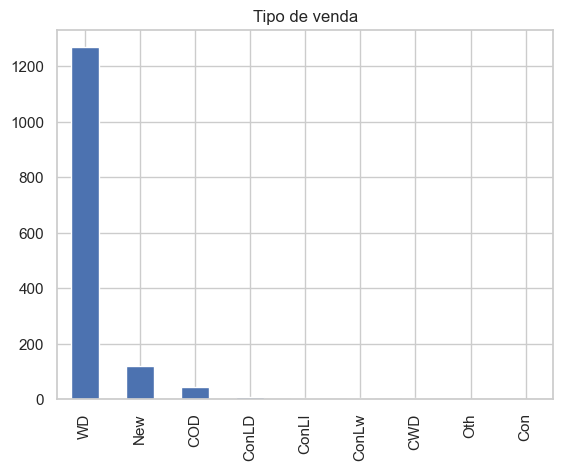

In [6]:
df["SaleType"].value_counts().plot.bar()
plt.title("Tipo de venda")
plt.show()

# 2) Qual categoria mais frequente?

WD, corresponde a ~87%

In [7]:
total = df["SaleType"].count()
percent = (df["SaleType"].value_counts().WD / total) * 100
str(round(percent, 2)) + "%"

'86.78%'

# 3) Cite o nome de uma coluna com dados numéricos e plote um histograma.

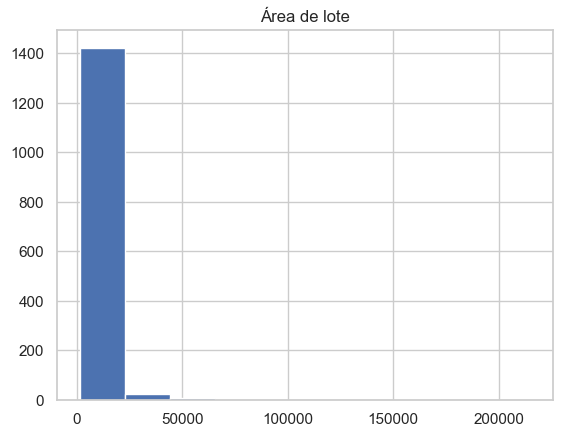

In [8]:
df["LotArea"].hist()
plt.title("Área de lote")
plt.show()

# 4) Qual a média da coluna SalePrice?

180921

In [9]:
sale_price = df["SalePrice"].copy()
int(sale_price.mean())

180921

# 5) Qual a mediana da coluna SalePrice?

In [10]:
sale_price.median()

163000.0

# 6) Faça um boxplot da coluna SalePrice e comente suas descobertas a respeito dessa coluna.

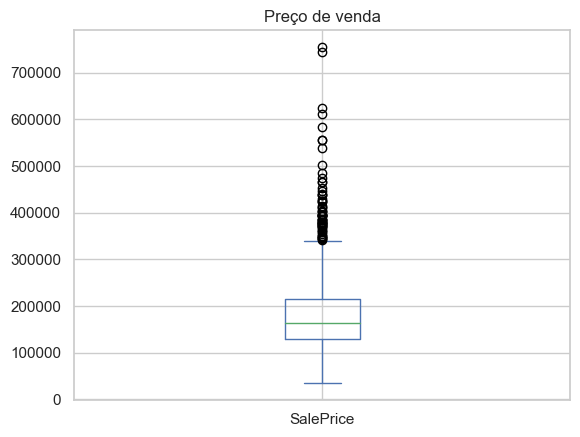

In [11]:
sale_price.plot.box()
plt.title("Preço de venda")
plt.show()

As áreas que contém a maior variação de valores é a do Q3 até o limite superior, é onde se observa maior espaçamento, sendo assim pode-se concluir que os preços dentro desse alcance são os que mais oscilam dentro do negócio, diferente dos valores entre Q2 e Q1 quais são os mais estáveis, representando um negócio mais seguro e garantido porém menos lucrativo.

A maioria dos outliers estão entre ~330.000 e ~450.000, possívelmente seja um mercado menos explorado pela empresa, porém existente.

# 7) Faça uma amostra aleatória do dataset. Qual o menor tamanho em que a estatísticas da amostra continuam próximas a da população?

204, ~14%

In [12]:
def good_sample(dataframe: pd.DataFrame, max_range: int = 30) -> pd.DataFrame:
    """
    Selects a representative sample of the input dataframe by iteratively testing
    different sample sizes and selecting the one with the highest absolute correlation.

    Args:
        dataframe (pd.DataFrame): The input dataframe to sample from.
        max_range (int, optional): The maximum sample size to test, expressed as a percentage
            of the total number of rows in the input dataframe. Defaults to 30.

    Raises:
        Exception: If the maximum range is set to 80% or higher.

    Returns:
        pd.DataFrame: A representative sample of the input dataframe, selected based on
            the highest absolute correlation among all tested sample sizes.
    """

    # Get the correlational constant
    get_k = lambda x: np.abs(x.corr(numeric_only=True).values.sum())

    if max_range >= 80:
        raise Exception("The sample percentage should be no more than 80%.")

    # Make a copy of the input dataframe to avoid modifying the original
    dataframe = dataframe.copy()

    # Calculate the absolute correlation across all columns
    k = get_k(dataframe)

    # Get the total number of rows in the dataframe
    row_count = dataframe.shape[0]

    # Initialize variables to store the lowest correlation and the best sample
    lowest_k = k
    good_dataframe = None

    # Test different sample sizes and select the one with the highest absolute correlation
    for i in range(1, max_range):
        percent = i / 100
        size = int(percent * row_count)
        sample = dataframe.sample(size)
        actual_k = get_k(sample)
        if actual_k < lowest_k:
            lowest_k = actual_k
            good_dataframe = sample.copy()

    return good_dataframe

In [13]:
sample = good_sample(df)

In [14]:
sample.shape[0]

204

In [15]:
sample.shape[0] / df.shape[0] * 100  # Percentage

13.972602739726028

# 8) Faça uma matriz de correlação do dataset.


In [16]:
df.corr(numeric_only=True)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


# 9) Plote um scatterplot da variável SalePrice e uma variável com correlação positiva de sua escolha.

Qualidade x Preço

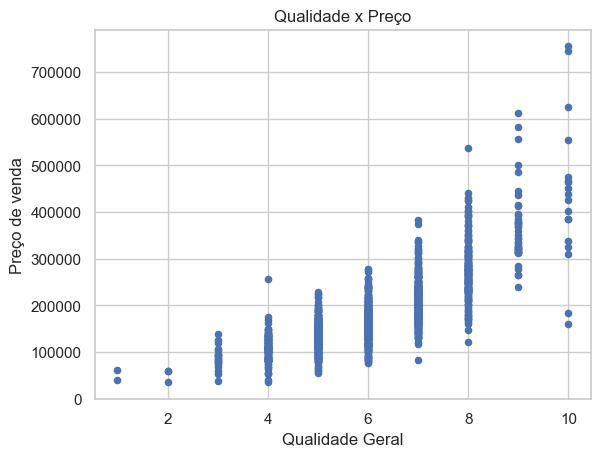

In [17]:
df.plot.scatter(x="OverallQual", y="SalePrice")
plt.title("Qualidade x Preço")
plt.xlabel("Qualidade Geral")
plt.ylabel("Preço de venda")
plt.show()

# 10) Plote um scatterplot da variável SalePrice e uma variável com correlação negativa de sua escolha.

Área da varanda x Preço

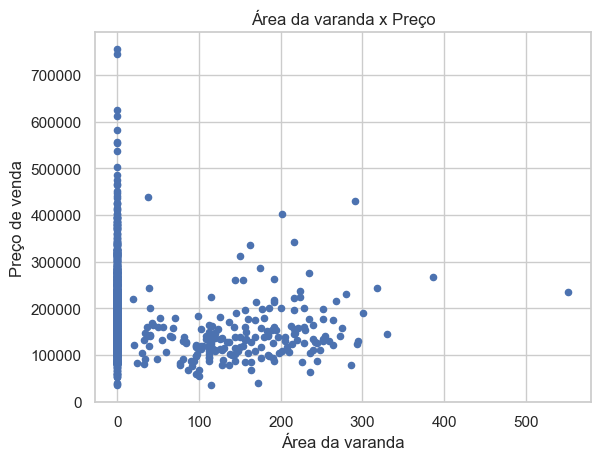

In [18]:
df.plot.scatter(x="EnclosedPorch", y="SalePrice")
plt.title("Área da varanda x Preço")
plt.xlabel("Área da varanda")
plt.ylabel("Preço de venda")
plt.show()